In [0]:
install.packages("ggplot2")
install.packages("dplyr")
install.packages("gplots")

In [0]:
library(ggplot2)
library(dplyr)
library(gplots)

In [45]:
dir()

[1] "63_Markers.csv" "sample_data"

In [70]:
data = read.csv("63_Markers.csv", header = TRUE)
gene_names = data[1:nrow(data), 1]
groups = colnames(data)[2:end(ncol(data))]
head(data)

Warning message in 2:end(ncol(data)):
“numerical expression has 2 elements: only the first used”


,Gene,S1,S2,S3,S4,S5,T1,T2,T3,T4,T5,T6
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CDH1,4888,1699,11371.98,5300.00,3835,24.95,1,55.95,25,5.04,1.87
2,LAMA3,39571,9200,8820.00,16927.00,23534,4.00,395,140.00,142,100.00,27.00
3,LAMC2,122332,23363,10782.00,22509.33,54863,381.00,36,12.00,416,182.20,1630.00
4,COL17A1,17726,13038,52108.00,32768.00,20680,139.00,6,7.00,0,3.00,158.00
5,FXYD3,2393,2686,19698.00,8186.00,3423,1.00,3,3.00,1,6.00,7.00
6,DSP,5229,11714,44788.00,6534.00,17266,522.00,2,7.00,580,27.00,1707.00


In [71]:
ee = as.matrix(data[,2:ncol(data)])
class(ee) = "numeric"
ee[ee<0] = 0 
eee = log2(ee+1) 

meds = apply(eee,1,median) #apply meadian function for each row
tt = as.matrix(t(t(eee)-meds)) #normalize, use subtrate instead of divide 'cause it's log scale
row.names(tt) = gene_names
head(tt)

,S1,S2,S3,S4,S5,T1,T2,T3,T4,T5,T6
CDH1,6.423700,2.101962,2.801782,5.059166,8.905387,-6.040430,-4.7298246,1.7441611,-1.899473,-3.1603390,-7.16194385
LAMA3,11.365302,4.628416,4.610871,5.427564,8.568091,-2.925999,2.9289169,1.4671260,-2.078533,-0.6637166,2.80735492
LAMC2,12.315492,9.988438,4.214077,12.458300,10.936217,3.022840,-2.8617945,-0.1069152,4.060047,1.7099208,8.44503254
COL17A1,8.091293,9.670546,7.484370,9.385334,5.478037,1.563686,-3.3011695,-7.2548515,-7.761551,-6.3531468,-2.80346101
FXYD3,4.749474,7.932349,4.812564,2.535595,5.787271,-7.262894,-1.4594316,-9.6216398,-3.000000,0.4854268,-4.59245704
DSP,9.182670,10.346144,5.216039,6.486125,6.075730,5.163759,-0.4150375,-2.2137361,3.350770,-3.8220017,0.06655119


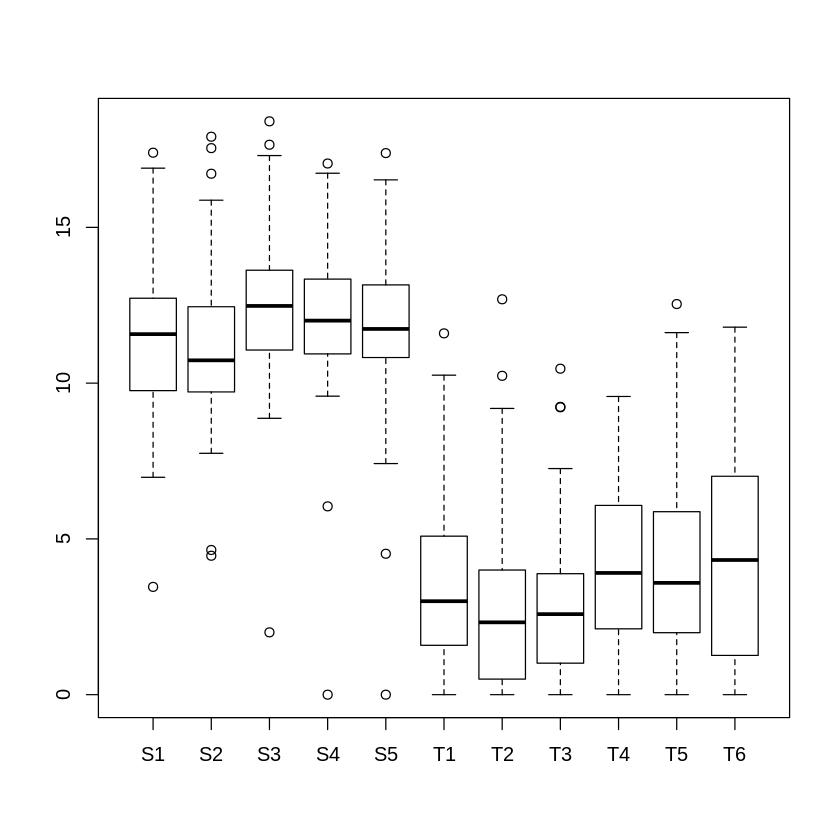

In [61]:
boxplot(data.frame(eee))

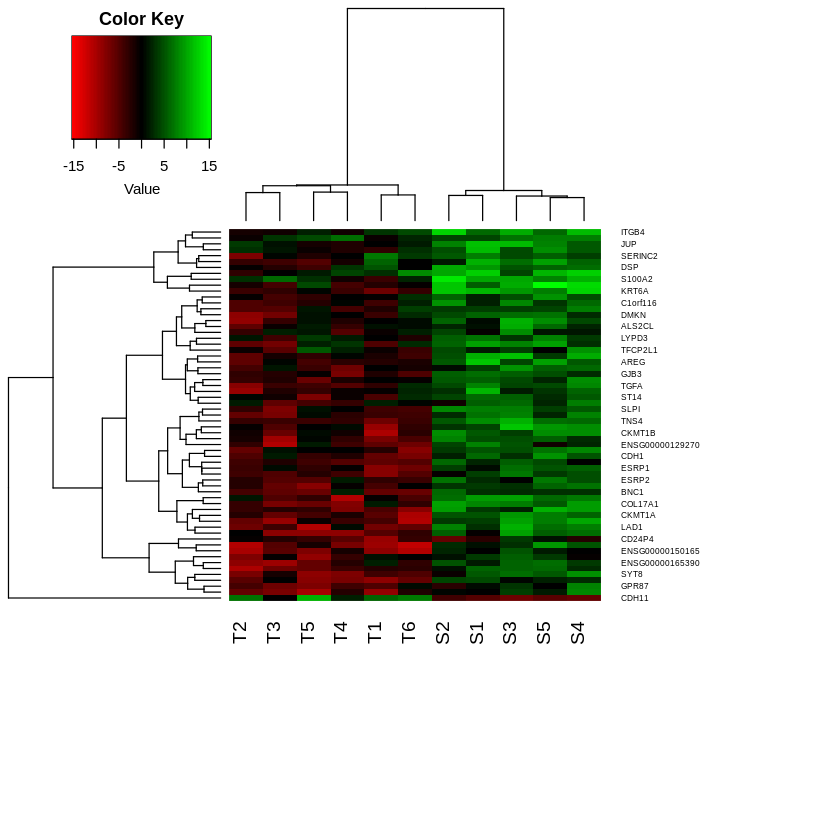

In [74]:
heatmap.2(tt, density.info="none", trace = "none", margins=c(12,12), cexRow=0.5, col=redgreen(100),
          hclustfun=function(x) hclust(dist(x, method="euclidean"), method="ward.D2"))

In [0]:
pdf("heatmap.pdf")
heatmap.2(tt, density.info="none", trace = "none", margins=c(12,12), cexRow=0.5, col=redgreen(100),
          hclustfun=function(x) hclust(dist(x, method="euclidean"), method="ward.D2"))
tmp <- dev.off ()